# 作業

- 作業目標 : iris (dataset.load_iris()) 資料嘗試跑 kmeans (可以測試不同的群數 , init 等)

In [2]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

### 載入 相關套件 並 執行 kmean 實驗 ...

- 實驗測試不同的群數
- 實驗測試不同的初始值
- 呈現結果

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
#from sklearn import datasets

np.random.seed(87)

In [51]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [34]:
# 設定模型估計參數（分成幾群）
estimators = [('KMeans_3', KMeans(n_clusters=3)),
              ('KMeans_4', KMeans(n_clusters=4)),
              ('KMeans_5', KMeans(n_clusters=5)),
              ('KMeans_bad_init', KMeans(n_clusters=4, n_init=87, 
                                         init='random'))]

/Users/lishunbin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


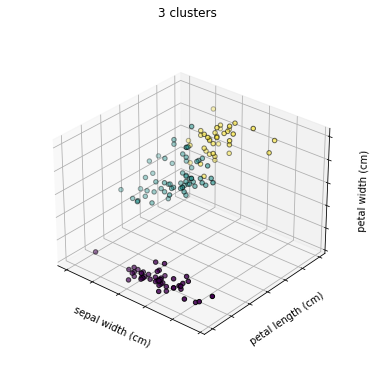

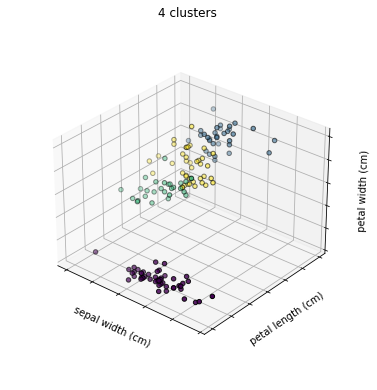

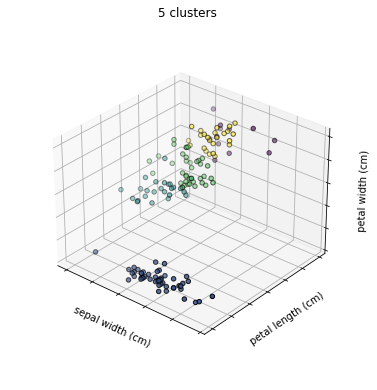

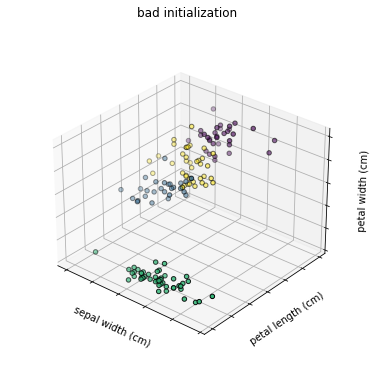

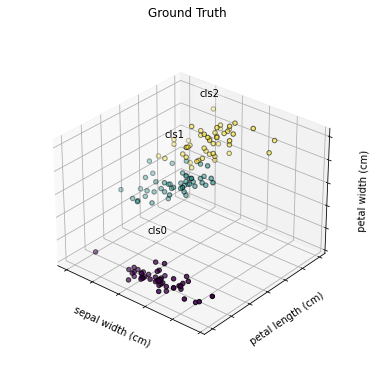

In [91]:
# 建模
fignum = 1
titles = ['3 clusters', '4 clusters', '5 clusters', 'bad initialization']

for name, est in estimators:
    fig = plt.figure(fignum, figsize=(5,5))
    ax = Axes3D(fig, rect=[0,0,1,1], elev=30, azim=-50)
    
    # fit data
    est.fit(X)
    
    labels = est.labels_
    
    # plot clusters
    ax.scatter(X[:, 1], X[:, 2], X[:, 3],
              c=labels.astype(np.float), edgecolor='k')
    
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('sepal width (cm)') # 第1個特徵
    ax.set_ylabel('petal length (cm)') # 第2個特徵
    ax.set_zlabel('petal width (cm)') # 第3個特徵
    ax.set_title(titles[fignum-1])
    ax.dist = 12
    fignum = fignum + 1

# plot ground truth
fig = plt.figure(fignum, figsize=(5,5))
ax = Axes3D(fig, rect=[0,0,1,1], elev=30, azim=-50)

for name, label in [('cls0', 0), # ('第幾群', 第幾群)
                    ('cls1', 1),
                    ('cls2', 2)]:
    ax.text3D(X[y == label, 1].mean(),  # centroid的x位置: [y = 第1個特徵]取平均
              X[y == label, 2].mean(),  # centroid的y位置: [y = 第2個特徵]取平均
              X[y == label, 3].mean() + 1, # centroid的z位置+1(name的位置): [y = 第3個特徵]取平均
              name, 
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
#y = np.choose(y, [0.0, 1.0, 2.0]).astype(np.float)
ax.scatter(X[:, 1], X[:, 2], X[:, 3], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('sepal width (cm)')
ax.set_ylabel('petal length (cm)')
ax.set_zlabel('petal width (cm)')
ax.set_title('Ground Truth')
ax.dist = 12

fig.show()